# *Library and file dependancies*

In [76]:
# Single cell 
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
# Consider aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'font.size': 17})
# Output control
import warnings
warnings.filterwarnings("ignore")

**Also load the processed files and the scGmix pipeline for the component selection method**

In [77]:
adata = sc.read("datasets/processed_cellcounts.h5ad")
padata = sc.read("datasets/processed_pooledcounts.h5ad")
from scGmix import scgmix

# **Dimensionality reduction & Visualization**

For Dimensionality reduction & visualization we utilize the `dimreduction` method of the `scGmix` class we have created from the previous assignment.
In the following configuration it utilizes PCA, with the knee points of the scree plot to select the optimal number of componenets. Additionally it utilizes The computed PCA for a UMAP and TSNE embedding. 

screeplot selected 9 principal components out of 100


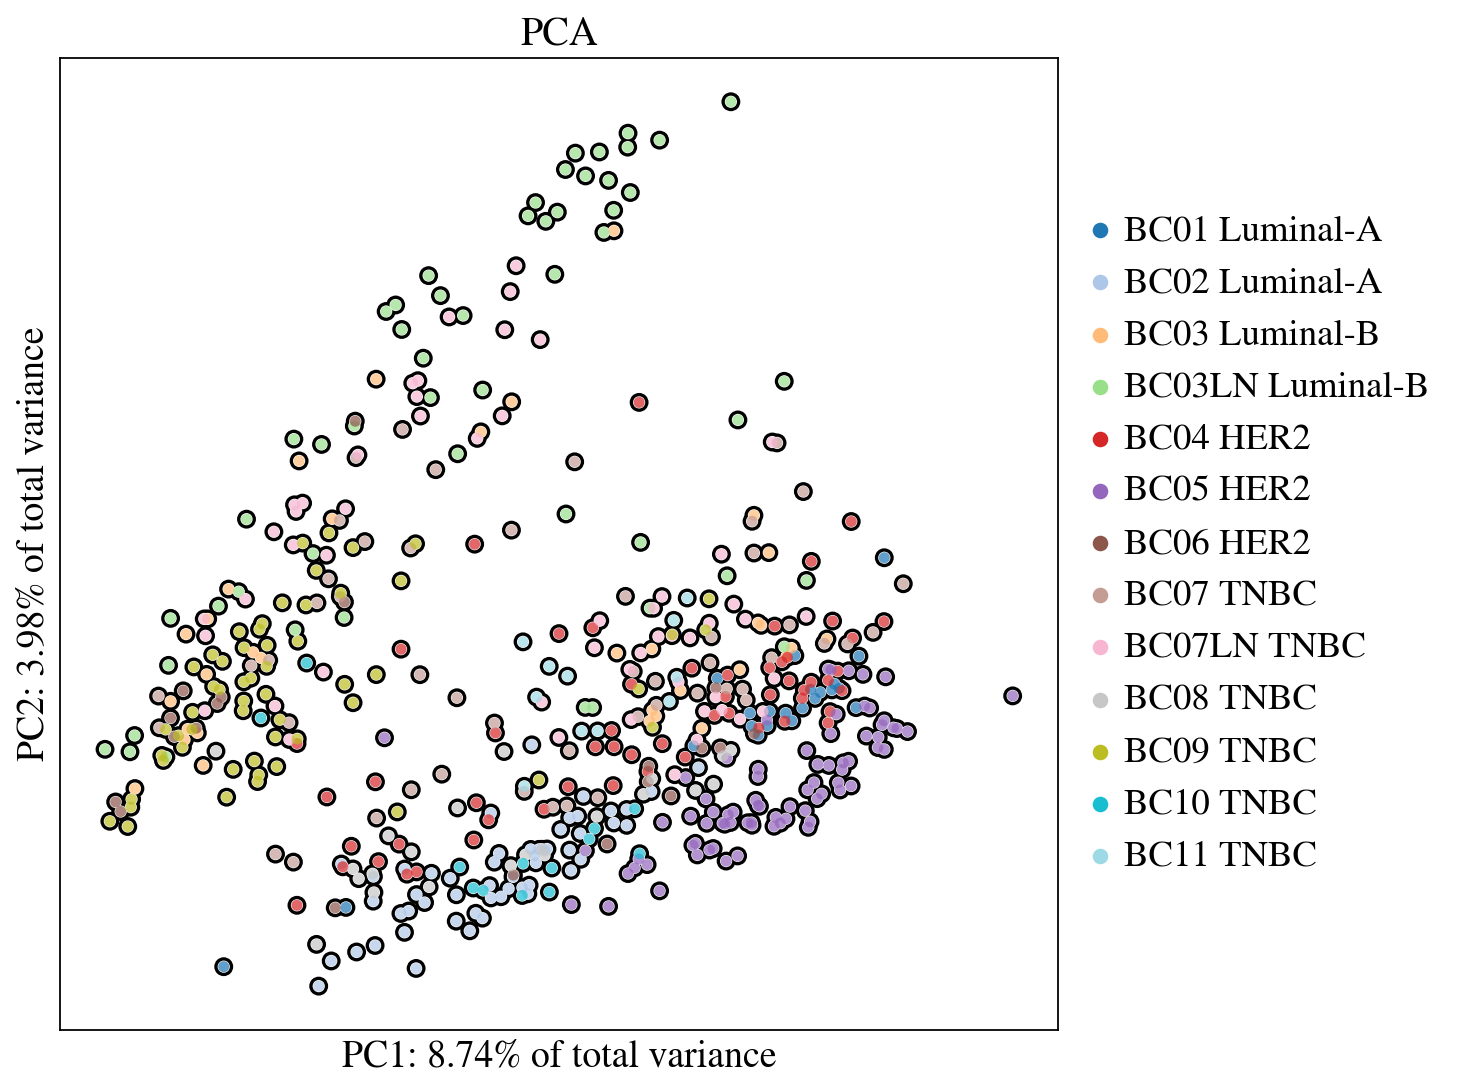

In [78]:
pca_pipeline = scgmix(adata=adata,rand_seed=42,method="PCA")
pca_pipeline.dimreduction(pc_selection_method="screeplot",plot_result=True,verbose=True, color="tumor_groups")

screeplot selected 9 principal components out of 100


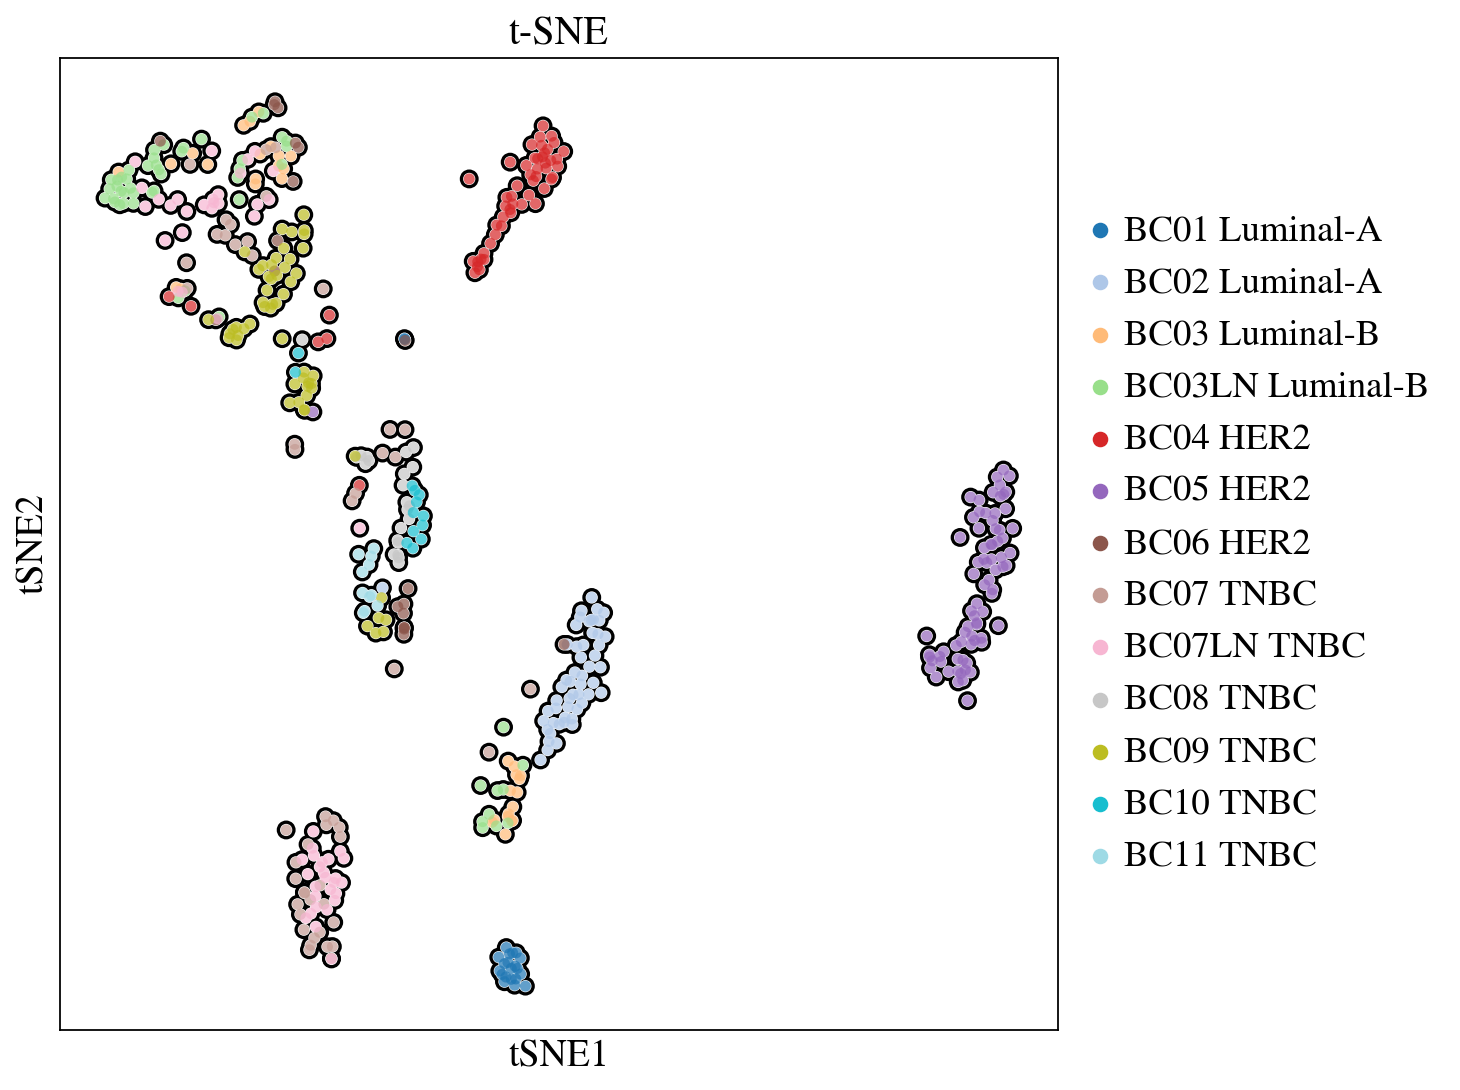

In [79]:
tsne_pipeline = scgmix(adata=adata,rand_seed=42,method="TSNE")
tsne_pipeline.dimreduction(pc_selection_method="screeplot",plot_result=True,verbose=True,color="tumor_groups")

screeplot selected 9 principal components out of 100


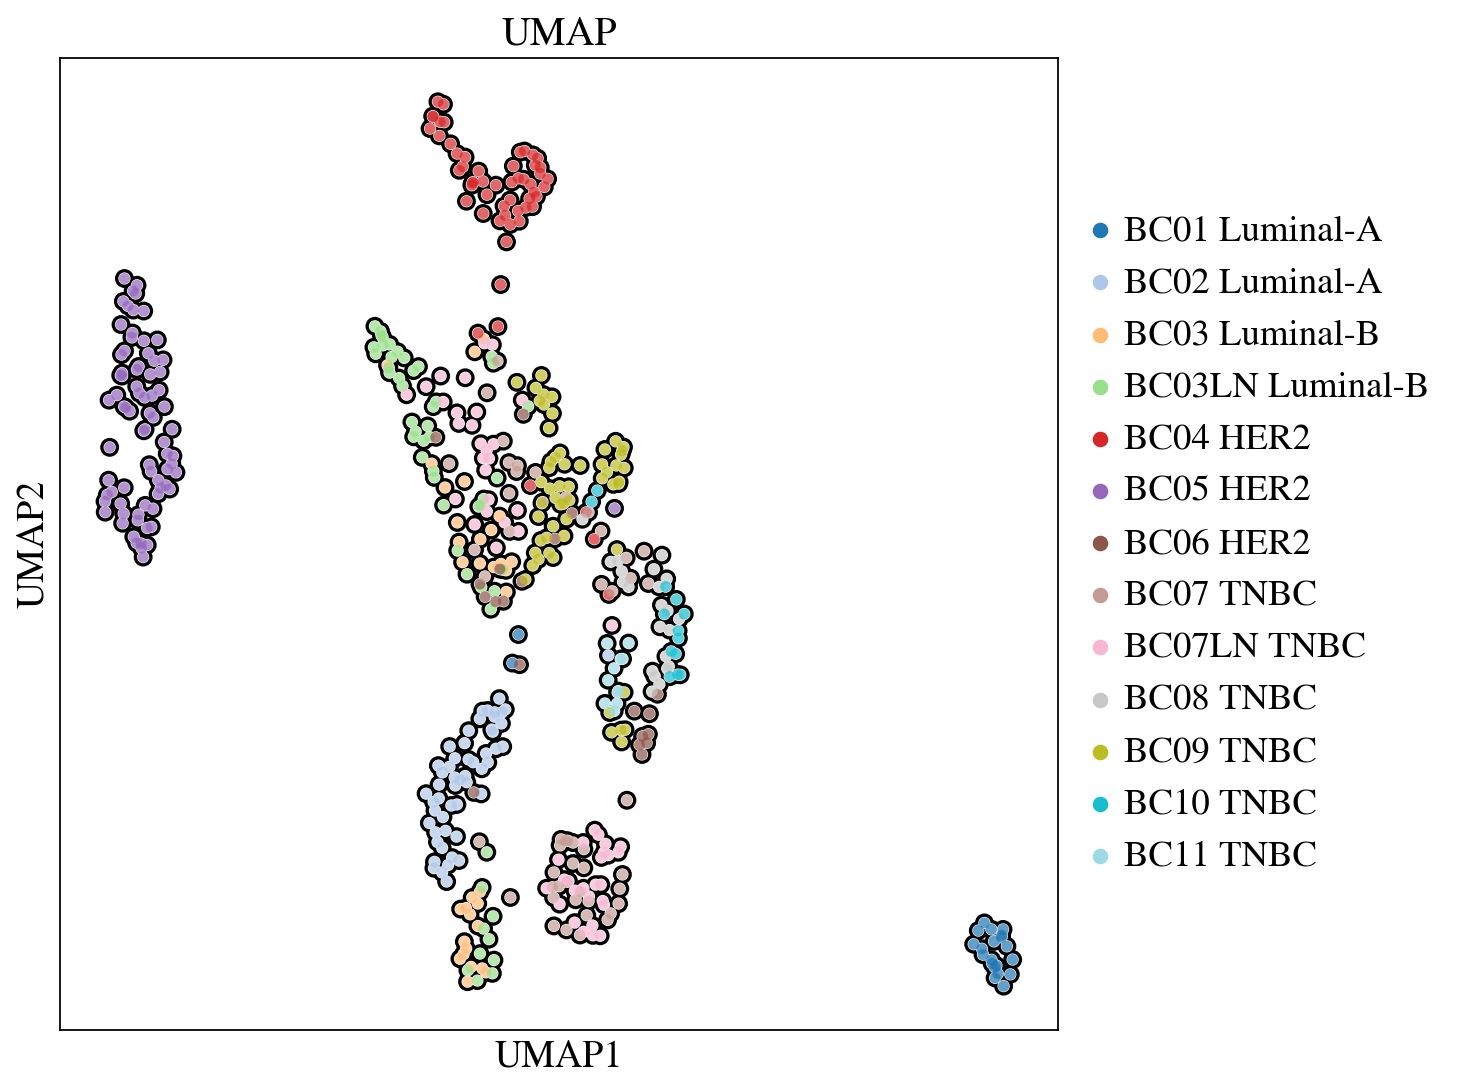

In [80]:
umap_pipeline = scgmix(adata=adata,rand_seed=42,method="UMAP")
umap_pipeline.dimreduction(pc_selection_method="screeplot",plot_result=True,verbose=True,color="tumor_groups",n_neighbors=15,min_dist=0.75)

# **Pre cancer/non-cancer cells correlation analysis**

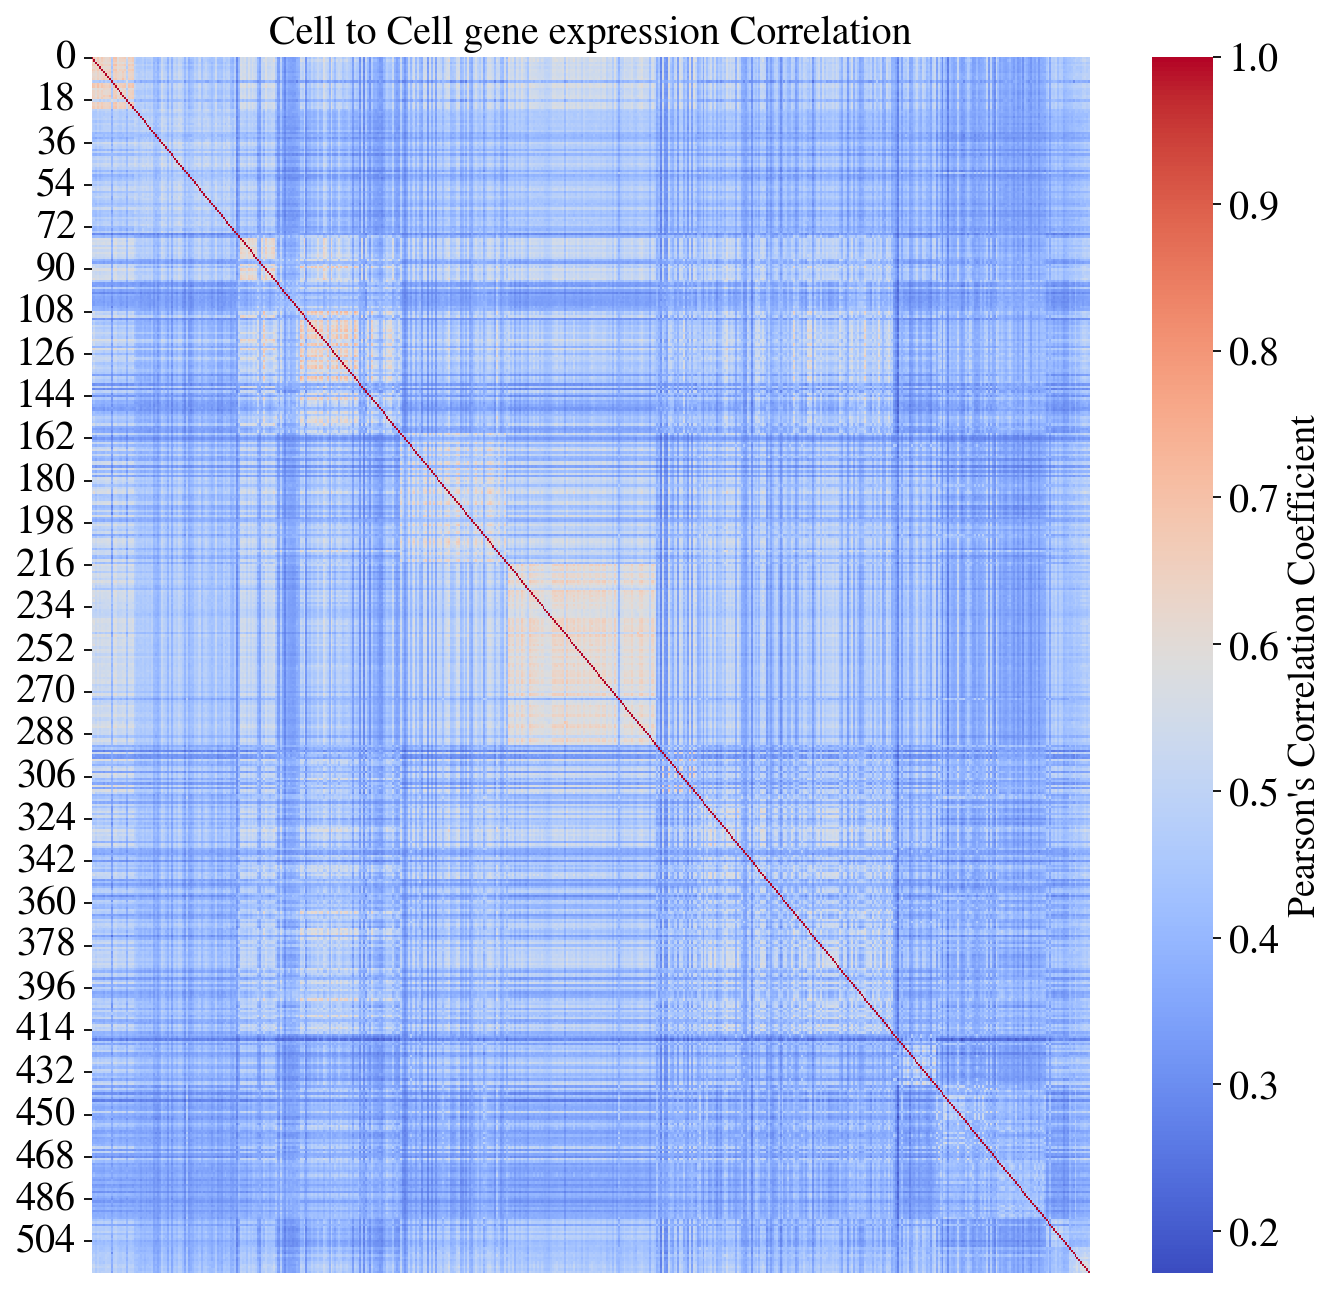

In [81]:
corr = np.corrcoef(adata.X)
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="coolwarm",cbar_kws={"label":"Pearson's Correlation Coefficient"},xticklabels=False)
plt.title("Cell to Cell gene expression Correlation")
plt.show()

Finally we can save the adata object with the annotated information

In [82]:
adata.write("datasets/dimreduced_cellcounts.h5ad")